In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your FASTA file
fasta_file_path = "/Users/kosio/Data/PolG/POLG_refseq_protein.fasta"

In [2]:
#species names
names = {}

#sequence
sequences = {"names": [], "sequences": [], "sequence_length":[]}

# Read the FASTA file
with open(fasta_file_path, "r") as fasta_file:
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequences["names"].append(record.description)
        sequences["sequences"].append(str(record.seq))
        sequences["sequence_length"].append(len(str(record.seq)))


1239


Text(0.5, 1.0, 'Sequence lengths')

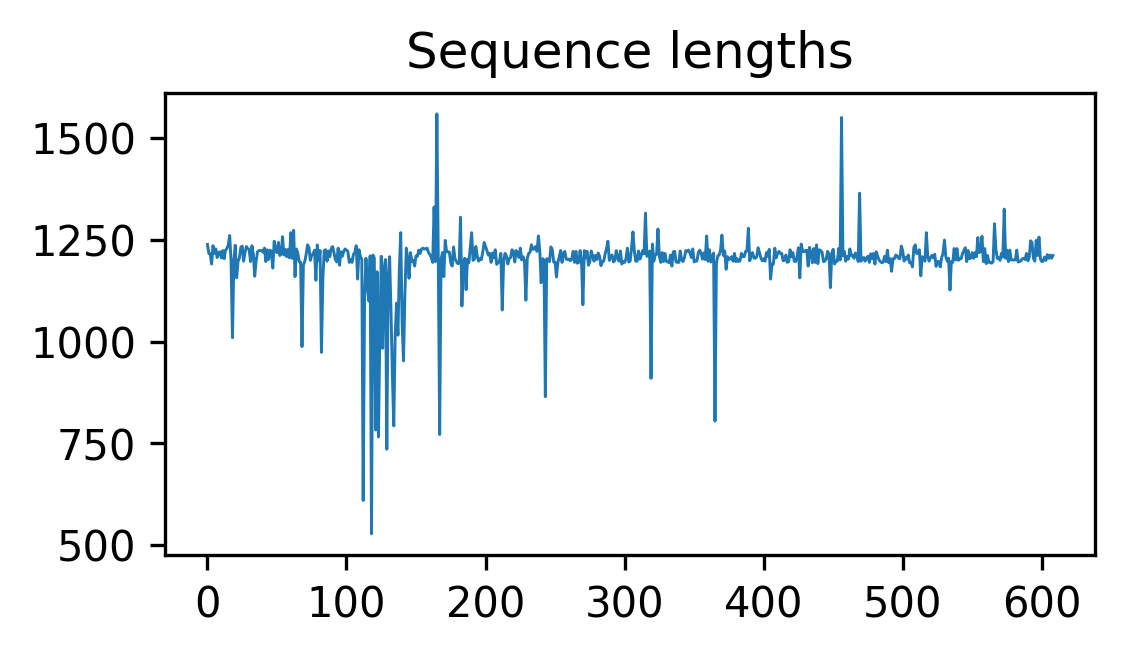

In [3]:
print(sequences["sequence_length"][0])
plt.figure(figsize=(4,2),dpi=300)
plt.plot(sequences["sequence_length"],lw=0.7)
plt.title("Sequence lengths")

In [4]:
from Levenshtein import distance as levenshtein_distance

def lev_dist(seq_list):
    distances = np.zeros([len(seq_list),len(seq_list)])
    for i in range(len(seq_list)):
        for j in range(len(seq_list)):
            if i>j:
                distances[i,j] = levenshtein_distance(seq_list[i],seq_list[j])
        if i%50==0:
            print(i)
    return distances + distances.T

d = lev_dist(sequences["sequences"])

0
50
100
150
200
250
300
350
400
450
500
550
600


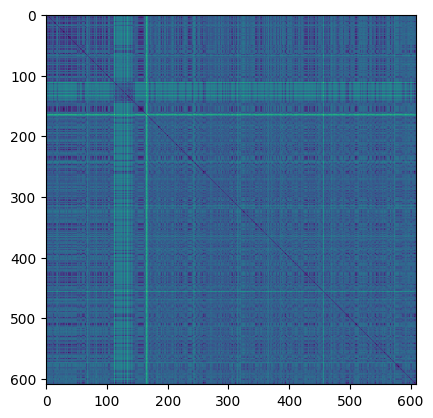

In [5]:
plt.imshow(d)

Text(0, 0.5, 'Sequence length')

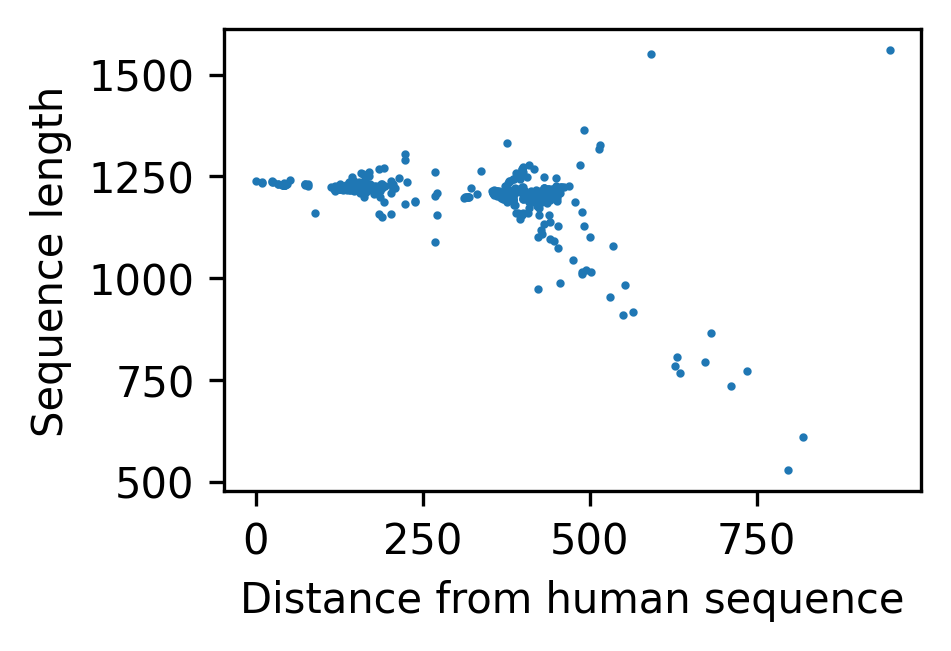

In [6]:
plt.figure(figsize=(3,2),dpi=300)
plt.scatter(d[0],sequences["sequence_length"],s=1)
plt.xlabel('Distance from human sequence')
plt.ylabel('Sequence length')

(-3642.1494465421697, 7457.96256100155, -2326.0525751368777, 12908.32859516154)

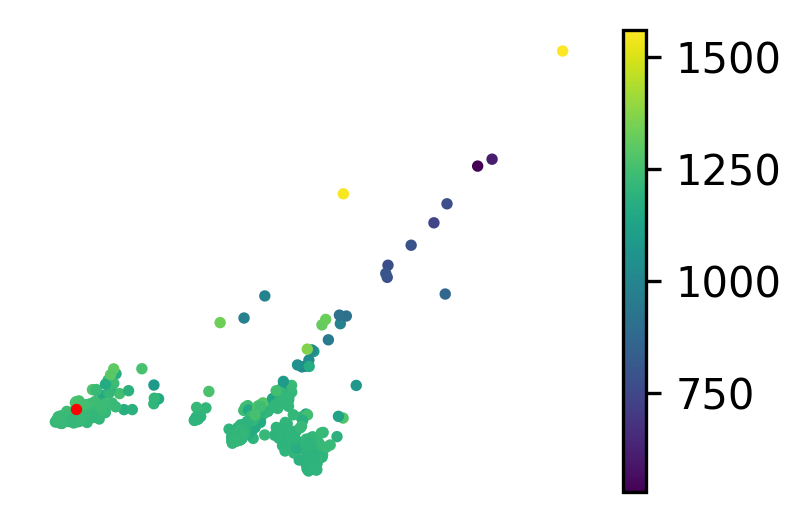

In [7]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
projection = reducer.fit_transform(d).T

plt.figure(figsize=(3,2),dpi=300)
plt.scatter(projection[0],projection[1],c=sequences["sequence_length"],s=3)
plt.colorbar()
plt.scatter(projection[0,0],projection[1,0],color='red',s=3)
plt.axis('off')


In [8]:
alternatives_sorted = np.argsort(d[0]+sequences["sequence_length"])
human_seq_length = sequences["sequence_length"][0]
top_5 = alternatives_sorted[1:40]
for i in top_5:
    print(sequences["names"][i]+"   " + str(human_seq_length - sequences["sequence_length"][i]) + " shorter and " + str(d[0,i])+ " distant.")


XP_003820468.4 DNA polymerase subunit gamma-1 isoform X1 [Pan paniscus]   5 shorter and 9.0 distant.
XP_016782887.2 DNA polymerase subunit gamma-1 isoform X1 [Pan troglodytes]   3 shorter and 9.0 distant.
XP_018866503.3 DNA polymerase subunit gamma-1 isoform X2 [Gorilla gorilla gorilla]   78 shorter and 89.0 distant.
XP_054306339.1 DNA polymerase subunit gamma-1 isoform X1 [Pongo pygmaeus]   4 shorter and 26.0 distant.
XP_030670848.1 DNA polymerase subunit gamma-1 isoform X1 [Nomascus leucogenys]   2 shorter and 24.0 distant.
XP_032031242.1 DNA polymerase subunit gamma-1 isoform X1 [Hylobates moloch]   9 shorter and 33.0 distant.
XP_024088182.2 DNA polymerase subunit gamma-1 isoform X1 [Pongo abelii]   1 shorter and 25.0 distant.
XP_055133242.2 DNA polymerase subunit gamma-1 isoform X1 [Symphalangus syndactylus]   8 shorter and 34.0 distant.
XP_025247323.1 DNA polymerase subunit gamma-1 [Theropithecus gelada]   11 shorter and 40.0 distant.
XP_007988539.1 DNA polymerase subunit gamma-1 

In [13]:
sequences["sequences"][0]

'MSRLLWRKVAGATVGPGPVPAPGRWVSSSVPASDPSDGQRRRQQQQQQQQQQQQQPQQPQVLSSEGGQLRHNPLDIQMLSRGLHEQIFGQGGEMPGEAAVRRSVEHLQKHGLWGQPAVPLPDVELRLPPLYGDNLDQHFRLLAQKQSLPYLEAANLLLQAQLPPKPPAWAWAEGWTRYGPEGEAVPVAIPEERALVFDVEVCLAEGTCPTLAVAISPSAWYSWCSQRLVEERYSWTSQLSPADLIPLEVPTGASSPTQRDWQEQLVVGHNVSFDRAHIREQYLIQGSRMRFLDTMSMHMAISGLSSFQRSLWIAAKQGKHKVQPPTKQGQKSQRKARRGPAISSWDWLDISSVNSLAEVHRLYVGGPPLEKEPRELFVKGTMKDIRENFQDLMQYCAQDVWATHEVFQQQLPLFLERCPHPVTLAGMLEMGVSYLPVNQNWERYLAEAQGTYEELQREMKKSLMDLANDACQLLSGERYKEDPWLWDLEWDLQEFKQKKAKKVKKEPATASKLPIEGAGAPGDPMDQEDLGPCSEEEEFQQDVMARACLQKLKGTTELLPKRPQHLPGHPGWYRKLCPRLDDPAWTPGPSLLSLQMRVTPKLMALTWDGFPLHYSERHGWGYLVPGRRDNLAKLPTGTTLESAGVVCPYRAIESLYRKHCLEQGKQQLMPQEAGLAEEFLLTDNSAIWQTVEELDYLEVEAEAKMENLRAAVPGQPLALTARGGPKDTQPSYHHGNGPYNDVDIPGCWFFKLPHKDGNSCNVGSPFAKDFLPKMEDGTLQAGPGGASGPRALEINKMISFWRNAHKRISSQMVVWLPRSALPRAVIRHPDYDEEGLYGAILPQVVTAGTITRRAVEPTWLTASNARPDRVGSELKAMVQAPPGYTLVGADVDSQELWIAAVLGDAHFAGMHGCTAFGWMTLQGRKSRGTDLHSKTATTVGISREHAKIFNYGRIYGAGQPFAERLLMQFNHRLTQQEAAEKAQQMYAATKGLRWYRLSD

In [10]:
sequences["names"][118]

'NP_002684.1 DNA polymerase subunit gamma-1 [Homo sapiens]'

In [12]:
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO

# Define input and output file paths
input_fasta = "/Users/kosio/Data/PolG/POLG_refseq_protein.fasta"
output_aln = "/Users/kosio/Data/PolG/POLG_MSA.aln"

# Set up MUSCLE command line
# Adjust the arguments if your MUSCLE version has specific requirements
muscle_cline = MuscleCommandline(input=input_fasta, out=output_aln)

try:
    # Execute the MUSCLE command
    stdout, stderr = muscle_cline()
    
    # Read and print the alignment
    alignment = AlignIO.read(output_aln, "fasta")
    print(alignment)

except Exception as e:
    # Print error details
    print(f"Error: {e}")
    print(f"Standard Output: {stdout}")
    print(f"Standard Error: {stderr}")


Error: Non-zero return code 1 from 'muscle -in /Users/kosio/Data/PolG/POLG_refseq_protein.fasta -out /Users/kosio/Data/PolG/POLG_MSA.aln', message 'Invalid command line'


NameError: name 'stdout' is not defined